In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import numpy as np

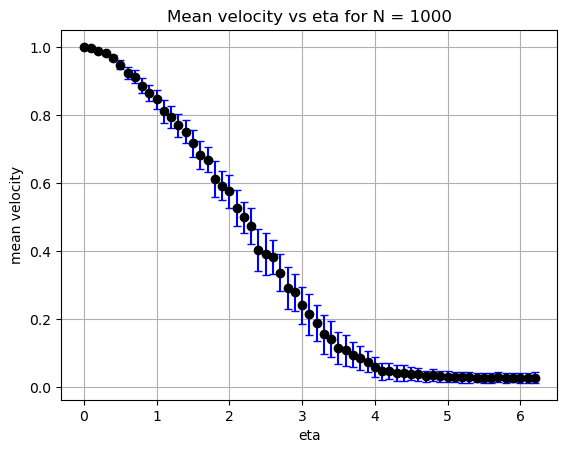

In [23]:
filenames = glob.glob("out/vicsek/1000/Noise*txt")
filenames.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))

N = filenames[0].split("/")[2]

means = []
stds = []
etas = []
for filename in filenames:
    df = pd.read_csv(filename, sep=" ", header=None)
    # for each row in the df, calculate the mean and std of the velocities
    sum_mean = 0
    sum_std = 0
    count = 0
    for (_, row) in df.iterrows():
        count += 1
        sum_mean += np.mean(row)
        sum_std += np.std(row)
    
    Mean = sum_mean / count
    Std = sum_std / count
    means.append(Mean)
    stds.append(Std)
    eta = filename.split("/")[3].split(".txt")[0].split("_")[1]
    eta = eta.split(".txt")[0]
    etas.append(float(eta))


plt.figure()
plt.title("Mean velocity vs eta for N = " + N)
plt.errorbar(etas, means, yerr=stds, fmt="o", color="black", ecolor="blue", capsize=3)
plt.xlabel("eta")
plt.ylabel("mean velocity")
plt.grid()
plt.show()

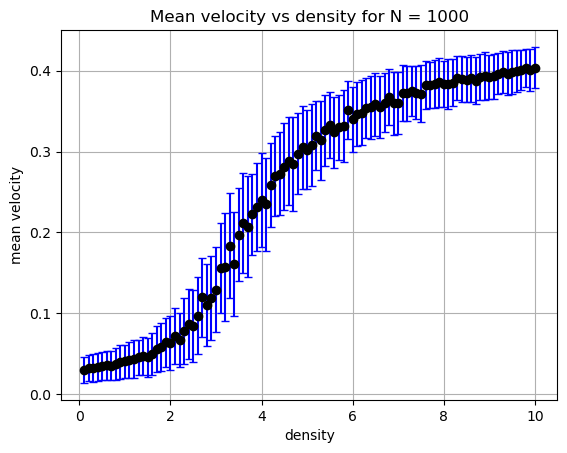

In [26]:
filenames = glob.glob("out/vicsek/1000/Density*txt")
filenames.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))
N = filenames[0].split("/")[2]


means = []
stds = []
etas = []
for filename in filenames:
    df = pd.read_csv(filename, sep=" ", header=None)
    # for each row in the df, calculate the mean and std of the velocities
    sum_mean = 0
    sum_std = 0
    count = 0
    for (_, row) in df.iterrows():
        count += 1
        sum_mean += np.mean(row)
        sum_std += np.std(row)
    
    Mean = sum_mean / count
    Std = sum_std / count
    means.append(Mean)
    stds.append(Std)
    eta = filename.split("/")[3].split(".txt")[0].split("_")[1]
    eta = eta.split(".txt")[0]
    etas.append(float(eta))

plt.figure()
plt.title("Mean velocity vs density for N = " + N)
plt.errorbar(etas, means, yerr=stds, fmt="o", color="black", ecolor="blue", capsize=3)
plt.xlabel("density")
plt.ylabel("mean velocity")
plt.grid()
plt.show()

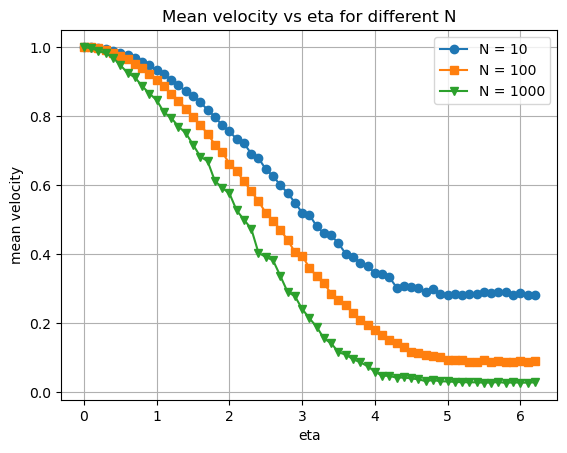

In [22]:
N10 = glob.glob("out/vicsek/10/Noise*txt")
N10.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))
N100 = glob.glob("out/vicsek/100/Noise*txt")
N100.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))
N1000 = glob.glob("out/vicsek/1000/Noise*txt")
N1000.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))
#N10000 = glob.glob("out/vicsek/10000/Noise*txt")
#N10000.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))

data = [N10, N100, N1000]
symbols = ["o", "s", "v", "^"]
plt.figure()


for i in range(len(data)):
    means = []
    stds = []
    etas = []
    for filename in data[i]:
        df = pd.read_csv(filename, sep=" ", header=None)
        # for each row in the df, calculate the mean and std of the velocities
        sum_mean = 0
        sum_std = 0
        count = 0
        for (_, row) in df.iterrows():
            count += 1
            sum_mean += np.mean(row)
            sum_std += np.std(row)
        
        Mean = sum_mean / count
        Std = sum_std / count
        means.append(Mean)
        stds.append(Std)
        eta = filename.split("/")[3].split(".txt")[0].split("_")[1]
        eta = eta.split(".txt")[0]
        etas.append(float(eta))
    plt.plot(etas, means, label="N = " + str(10**(i+1)), marker=symbols[i])

plt.title("Mean velocity vs eta for different N")
plt.xlabel("eta")
plt.ylabel("mean velocity")
plt.grid()
plt.legend()
plt.show()

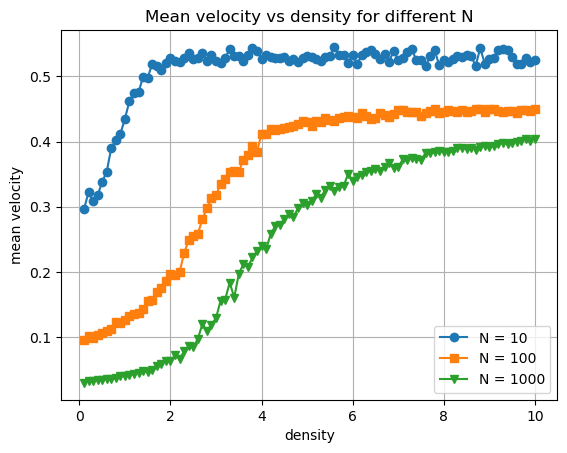

In [28]:
N10 = glob.glob("out/vicsek/10/Density*txt")
N10.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))
N100 = glob.glob("out/vicsek/100/Density*txt")
N100.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))
N1000 = glob.glob("out/vicsek/1000/Density*txt")
N1000.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))
#N10000 = glob.glob("out/vicsek/10000/Noise*txt")
#N10000.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))

data = [N10, N100, N1000]
symbols = ["o", "s", "v", "^"]
plt.figure()


for i in range(len(data)):
    means = []
    stds = []
    etas = []
    for filename in data[i]:
        df = pd.read_csv(filename, sep=" ", header=None)
        # for each row in the df, calculate the mean and std of the velocities
        sum_mean = 0
        sum_std = 0
        count = 0
        for (_, row) in df.iterrows():
            count += 1
            sum_mean += np.mean(row)
            sum_std += np.std(row)
        
        Mean = sum_mean / count
        Std = sum_std / count
        means.append(Mean)
        stds.append(Std)
        eta = filename.split("/")[3].split(".txt")[0].split("_")[1]
        eta = eta.split(".txt")[0]
        etas.append(float(eta))
    plt.plot(etas, means, label="N = " + str(10**(i+1)), marker=symbols[i])

plt.title("Mean velocity vs density for different N")
plt.xlabel("density")
plt.ylabel("mean velocity")
plt.grid()
plt.legend()
plt.show()